In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [17]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Группируем данные по идентификатору клиента и рассчитываем необходимые метрики
customer_data = df.groupby('Customer ID').agg({
    'Payment Method': lambda x: x.mode()[0],  # Наиболее частый метод оплаты
    'Total Price': 'sum',                   # Общие траты
    'Add-on Total': 'sum'                    # Затраты на дополнительные услуги
}).reset_index()

customer_data.head()

,Customer ID,Payment Method,Total Price,Add-on Total
0,1000,Credit Card,6279.42,66.30
1,1002,Cash,5020.60,60.16
2,1003,Cash,41.50,35.56
3,1004,Credit Card,83.00,65.78
4,1005,Debit Card,11779.11,75.33


In [18]:
# Доход по методу доставки
revenue_by_shipping = df.groupby('Shipping Type')['Total Price'].sum()

# Доход по типу продукта
revenue_by_product = df.groupby('Product Type')['Total Price'].sum()

# Доход по дополнительным услугам за месяц
revenue_by_month = df.groupby(pd.Grouper(key='Purchase Date', freq='M'))['Add-on Total'].sum()

# Доход по дополнительным услугам за квартал
revenue_by_quarter = df.groupby(pd.Grouper(key='Purchase Date', freq='Q'))['Add-on Total'].sum()

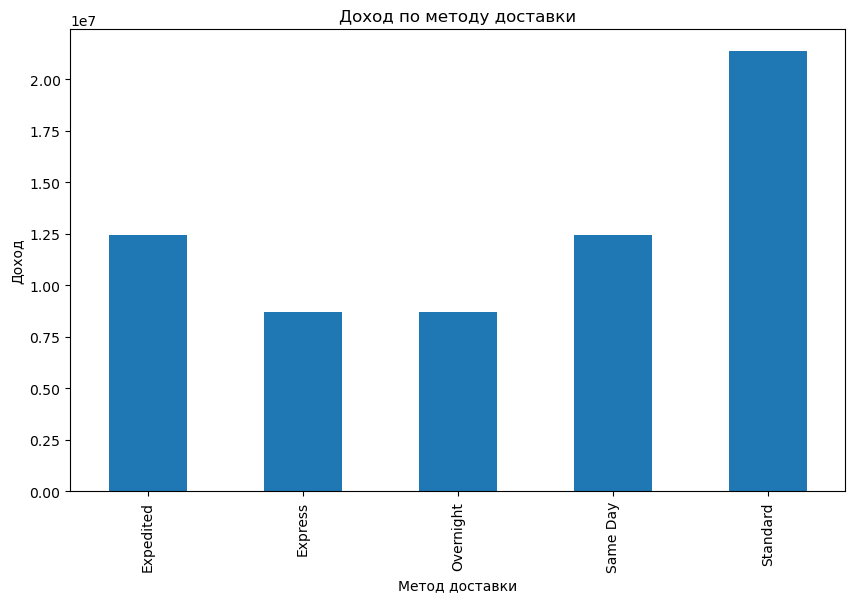

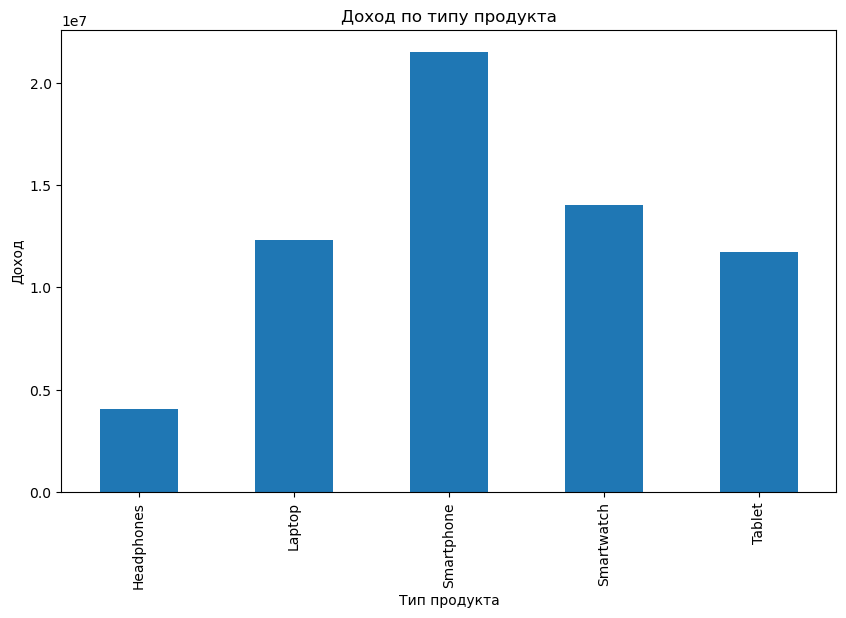

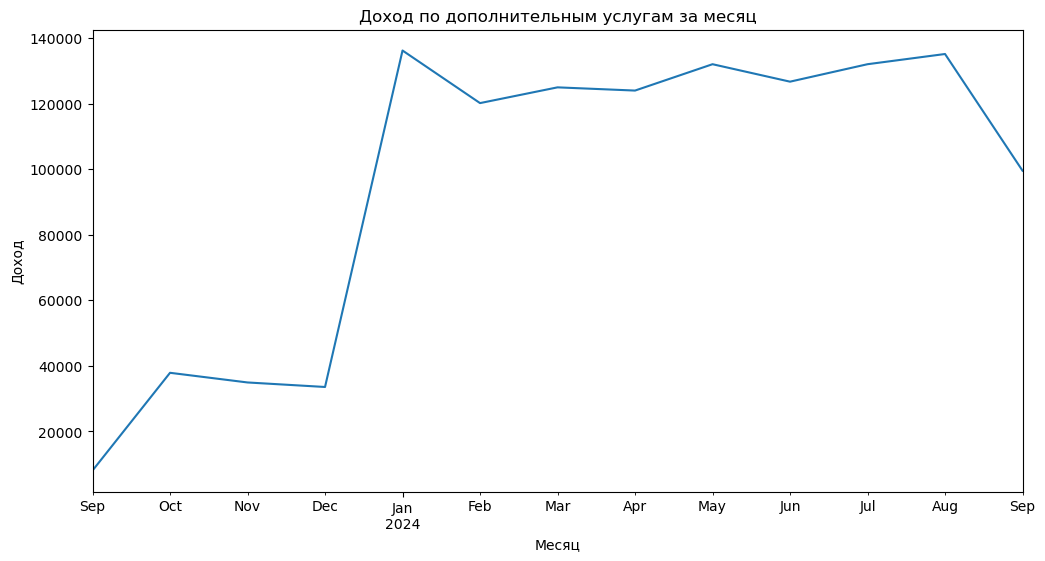

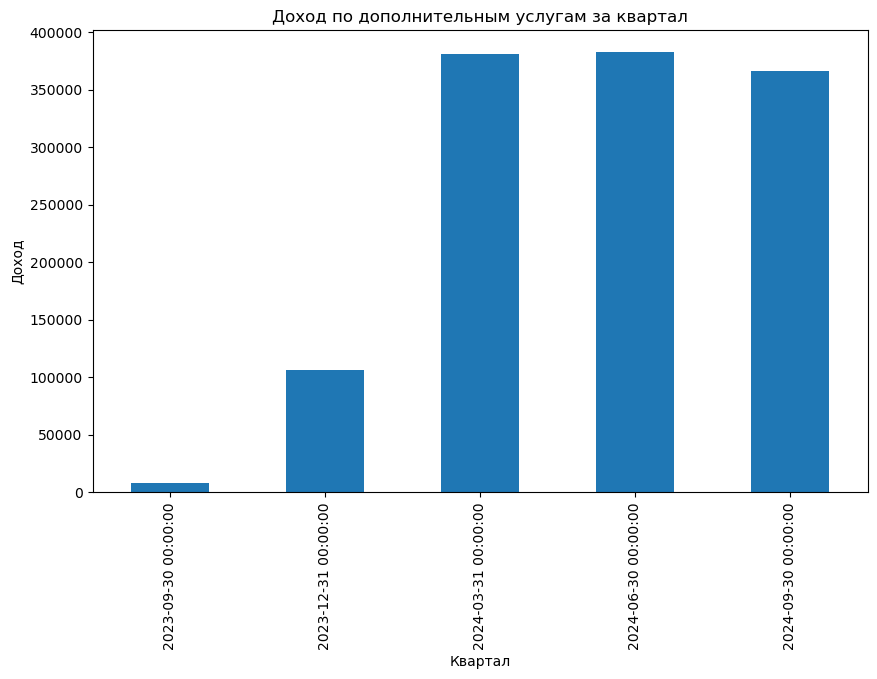

In [20]:
# Визуализация дохода по методу доставки
plt.figure(figsize=(10, 6))
revenue_by_shipping.plot(kind='bar')
plt.title('Доход по методу доставки')
plt.xlabel('Метод доставки')
plt.ylabel('Доход')
plt.show()

# Визуализация дохода по типу продукта
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar')
plt.title('Доход по типу продукта')
plt.xlabel('Тип продукта')
plt.ylabel('Доход')
plt.show()

# Визуализация дохода по дополнительным услугам за месяц
plt.figure(figsize=(12, 6))
revenue_by_month.plot(kind='line')
plt.title('Доход по дополнительным услугам за месяц')
plt.xlabel('Месяц')
plt.ylabel('Доход')
plt.show()

# Визуализация дохода по дополнительным услугам за квартал
plt.figure(figsize=(10, 6))
revenue_by_quarter.plot(kind='bar')
plt.title('Доход по дополнительным услугам за квартал')
plt.xlabel('Квартал')
plt.ylabel('Доход')
plt.show()